<a href="https://colab.research.google.com/github/Rimsha21/EDA-on-Global-Terrorist-Dataset/blob/main/Copy_of_Human_Activity_Recognition_System_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import  Adam


In [ ]:
from google.colab import files

In [ ]:
import io

In [ ]:
files = files.upload()

Saving WISDM_ar_v1.1_raw.txt to WISDM_ar_v1.1_raw.txt


In [ ]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
  try:
    line = line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()
    if last == '':
      breaki;
    temp = [line[0], line[1], line[2], line[3], line[4], last]
    processedList.append(temp)
  except:
    print('Error at line number: ', i)





Error at line number:  281873
Error at line number:  281874
Error at line number:  281875
Error at line number:  343419
Error at line number:  537501
Error at line number:  832901
Error at line number:  1098209


In [ ]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data= processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(1098203, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user      1098203 non-null  object
 1   activity  1098203 non-null  object
 2   time      1098203 non-null  object
 3   x         1098203 non-null  object
 4   y         1098203 non-null  object
 5   z         1098203 non-null  object
dtypes: object(6)
memory usage: 50.3+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1098203 non-null  object 
 1   activity  1098203 non-null  object 
 2   time      1098203 non-null  object 
 3   x         1098203 non-null  float64
 4   y         1098203 non-null  float64
 5   z         1098203 non-null  float64
dtypes: float64(3), object(3)
memory usage: 50.3+ MB


In [ ]:
Fs = 20
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

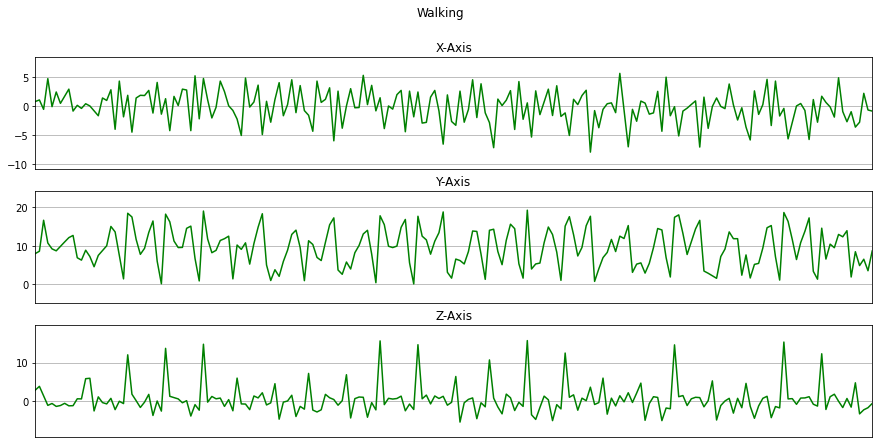

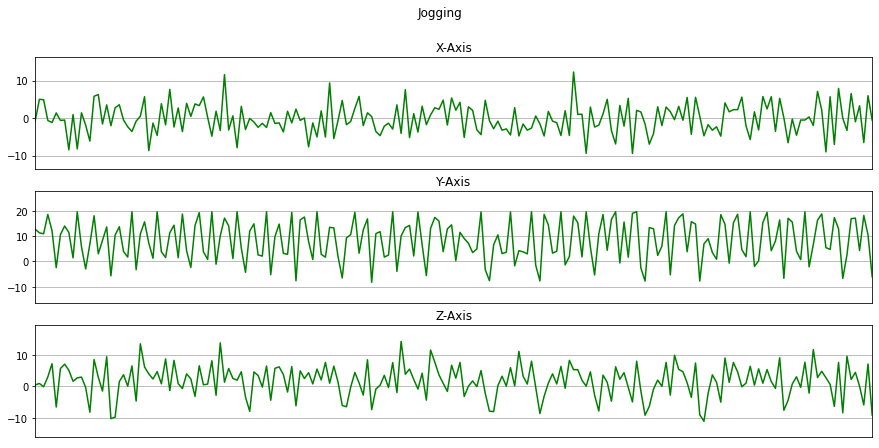

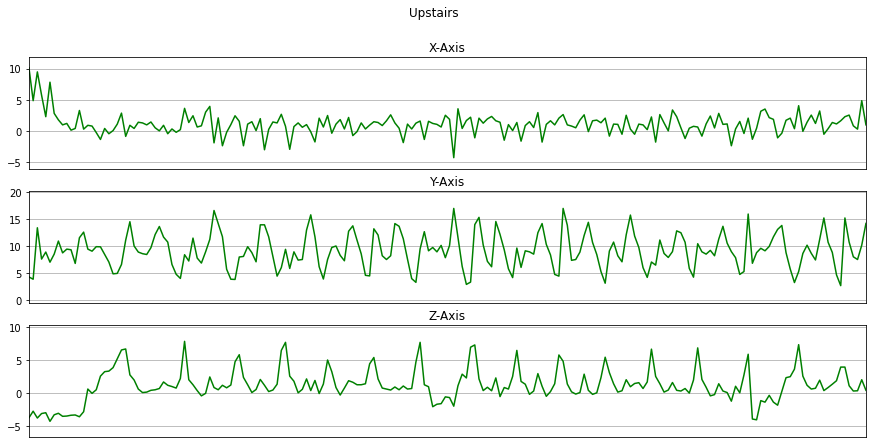

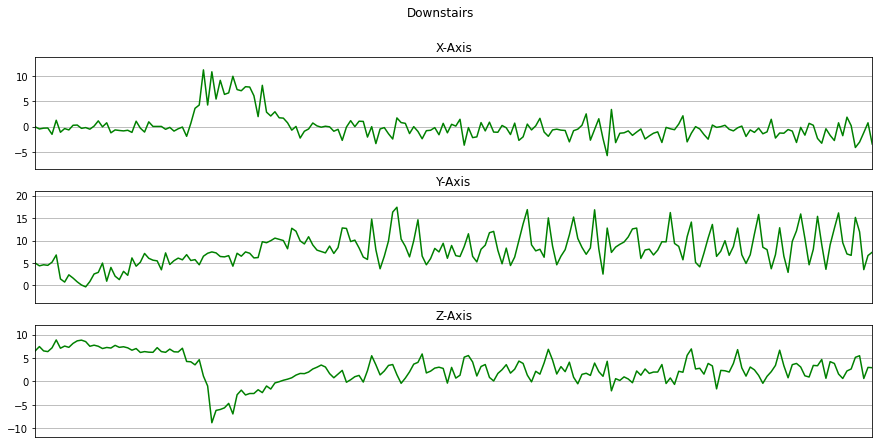

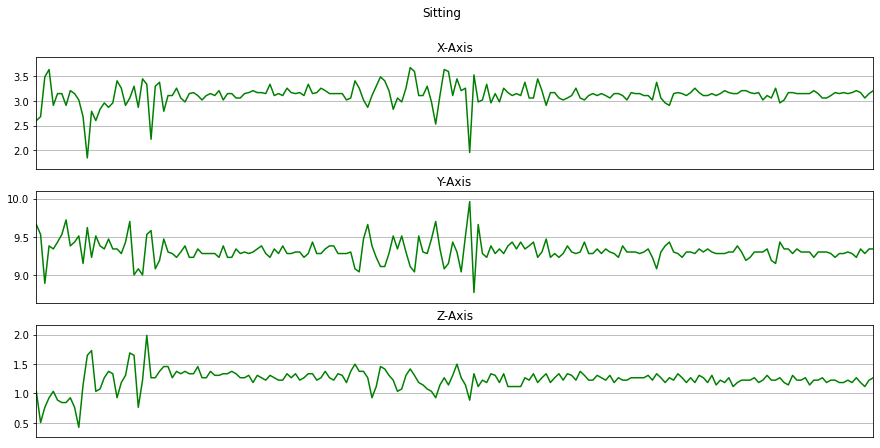

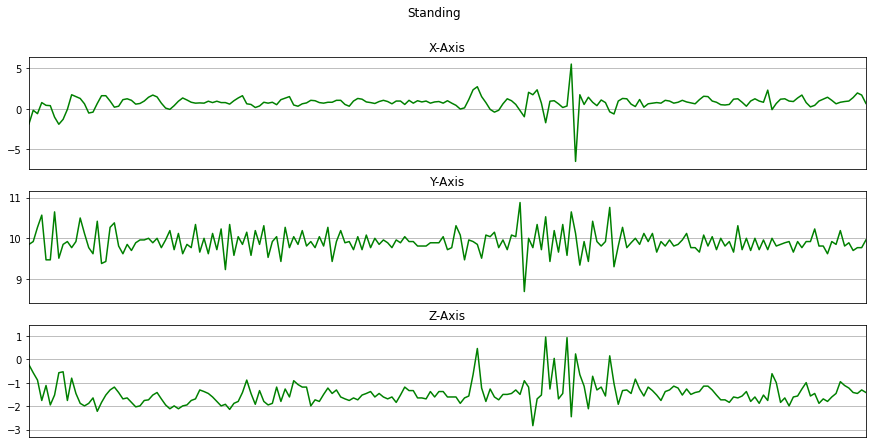

In [ ]:
def plot_activity(activity, data):
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize = (15,7),  sharex = True)
  plot_axis(ax0, data['time'], data['x'], 'X-Axis')
  plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
  plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
  plt.subplots_adjust(hspace=0.2)
  fig.suptitle(activity)
  plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['user', 'time'], axis=1).copy()
df.head()


,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [ ]:
#Balanced data
Walking = df[df['activity']=='Walking'].head(48395).copy()
Jogging = df[df['activity']=='Jogging'].head(48395).copy()
Upstairs = df[df['activity']=='Upstairs'].head(48395).copy()
Downstairs= df[df['activity']=='Downstairs'].head(48395).copy()
Sitting = df[df['activity']=='Sitting'].head(48395).copy()
Standing= df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape


(290370, 4)

In [ ]:
balanced_data['activity'].value_counts()

Sitting       48395
Upstairs      48395
Jogging       48395
Standing      48395
Walking       48395
Downstairs    48395
Name: activity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
balanced_data['label']= encoder.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [ ]:
encoder.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
#Standardization of Data
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=X , columns= ['x', 'y', 'z'])
scaled_X['label']= y.values
scaled_X.head()

,x,y,z,label
0,-0.034489,0.076967,0.266487,5
1,0.017285,0.187547,0.495750,5
2,-0.290769,1.637371,-0.075839,5
3,0.716230,0.573348,-0.650569,5
4,-0.202754,0.298127,-0.537507,5


In [ ]:
#Frame Preparation
import scipy.stats as stats


In [ ]:
Fs= 20
frame_size= Fs*4
hop_size= Fs*2

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

((7258, 80, 3), (7258,))

In [ ]:
(48395*6)/40

7259.25

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape

(5806, 80, 3)

In [ ]:
X_test.shape

(1452, 80, 3)

In [ ]:
X_train[0].shape

(80, 3)

In [ ]:
X_train = X_train.reshape(5806, 80, 3, 1)
X_test = X_test.reshape(1452, 80, 3, 1)



In [ ]:
# 2D CNN Model
model = Sequential()
model.add(Conv2D(16, (2,2), activation= 'relu', input_shape=X_train[0].shape))
model.add(Dropout(0.1))
model.add(Conv2D(16, (2,2), activation= 'relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))



In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test),  verbose=1)

Epoch 1/10
182/182 [==============================] - 2s 8ms/step - loss: 1.2479 - accuracy: 0.4947 - val_loss: 0.5993 - val_accuracy: 0.7479
Epoch 2/10
182/182 [==============================] - 1s 7ms/step - loss: 0.6276 - accuracy: 0.7431 - val_loss: 0.4701 - val_accuracy: 0.8244
Epoch 3/10
182/182 [==============================] - 1s 7ms/step - loss: 0.5394 - accuracy: 0.7801 - val_loss: 0.4442 - val_accuracy: 0.8175
Epoch 4/10
182/182 [==============================] - 1s 7ms/step - loss: 0.4817 - accuracy: 0.8028 - val_loss: 0.3739 - val_accuracy: 0.8512
Epoch 5/10
182/182 [==============================] - 1s 7ms/step - loss: 0.4223 - accuracy: 0.8312 - val_loss: 0.3501 - val_accuracy: 0.8691
Epoch 6/10
182/182 [==============================] - 1s 7ms/step - loss: 0.3935 - accuracy: 0.8361 - val_loss: 0.3313 - val_accuracy: 0.8836
Epoch 7/10
182/182 [==============================] - 1s 7ms/step - loss: 0.3525 - accuracy: 0.8529 - val_loss: 0.3206 - val_accuracy: 0.8815
Epoch 

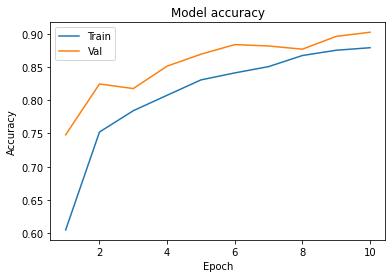

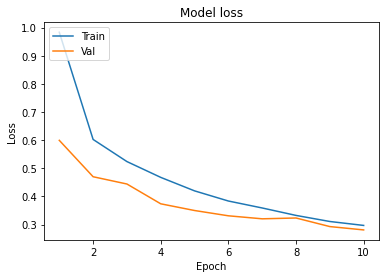

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, 10)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2f6ab0e250>)

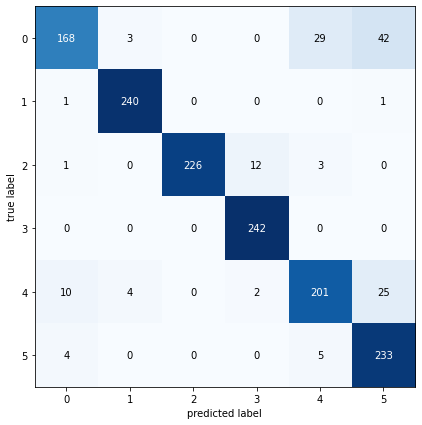

In [ ]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat,figsize= (7,7))